# Demonstrações dos resultados obtidos no 1o período do projeto (julho 2023 - feveiro 2024)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util import provas,load_padr, score_inep, load_sample

In [4]:
provas(2022,'CN')

array([1087, 1086, 1088, 1085])

In [18]:
prova = 1087
N = 1000
padr,notas_inep = load_padr(prova,N,nota_inep=True)
nota_calculado = score_inep(padr,prova)
df = notas_inep.join(nota_calculado)
df

,acertos,caderno,nota_inep,nota,se
candidato,,,,,
210056264683,6,1087,376.2,-1.105302,0.681375
210057836222,9,1087,480.0,-0.186811,0.478240
210057441895,15,1087,522.4,0.187535,0.496635
210056893710,9,1087,387.3,-1.007150,0.672098
210057526549,12,1087,474.8,-0.233024,0.590136
...,...,...,...,...,...
210054613352,11,1087,479.1,-0.194646,0.683182
210055492421,15,1087,528.4,0.240772,0.411359
210056451953,10,1087,456.3,-0.396585,0.557250


<Figure size 640x480 with 0 Axes>

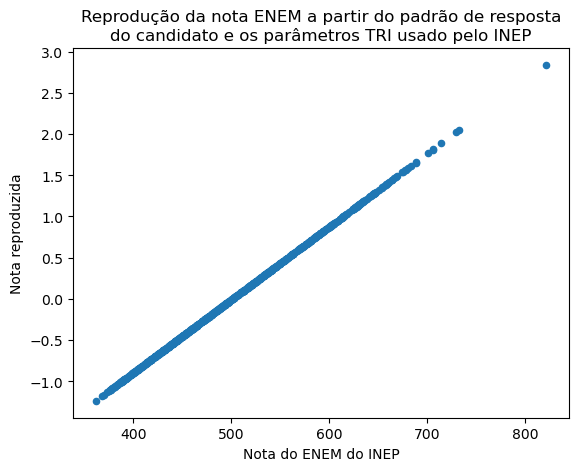

In [36]:
fig = plt.figure()
ax = df.plot(x='nota_inep',y='nota',kind='scatter')
ax.set_title("Reprodução da nota ENEM a partir do padrão de resposta\ndo candidato e os parâmetros TRI usado pelo INEP")
ax.set_xlabel("Nota do ENEM do INEP")
ax.set_ylabel("Nota reproduzida")
plt.savefig('images/rel1-rep-da-nota.png');

In [26]:
import scipy.stats as stats

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['nota'],df['nota_inep'])
slope,intercept

(113.09112650752579, 501.15080390082187)

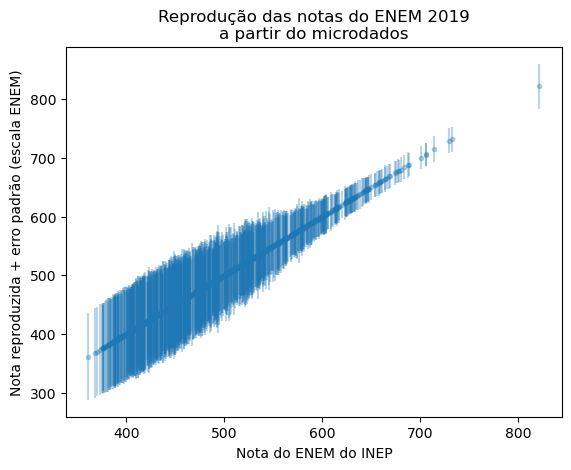

In [41]:
plt.errorbar(df['nota_inep'],df['nota']*slope+intercept,yerr=df['se']*slope,fmt=".",alpha=0.3)
ax = plt.gca()
ax.set_xlabel("Nota do ENEM do INEP")
ax.set_ylabel("Nota reproduzida + erro padrão (escala ENEM)")
ax.set_title("Reprodução das notas do ENEM 2019\na partir do microdados");
plt.savefig('images/rel2-rep-da-nota-erro.png');

In [66]:
q2map.values()

dict_values(['Nunca estudou', 'Não completou o 5º ano do EF ', 'Não completou o 9º ano do EF.', 'Não completou o Ensino Médio.', 'Não completou a Faculdade.', 'Não completou a Pós-graduação.', 'Completou a Pós-graduação.', 'Não sei.'])

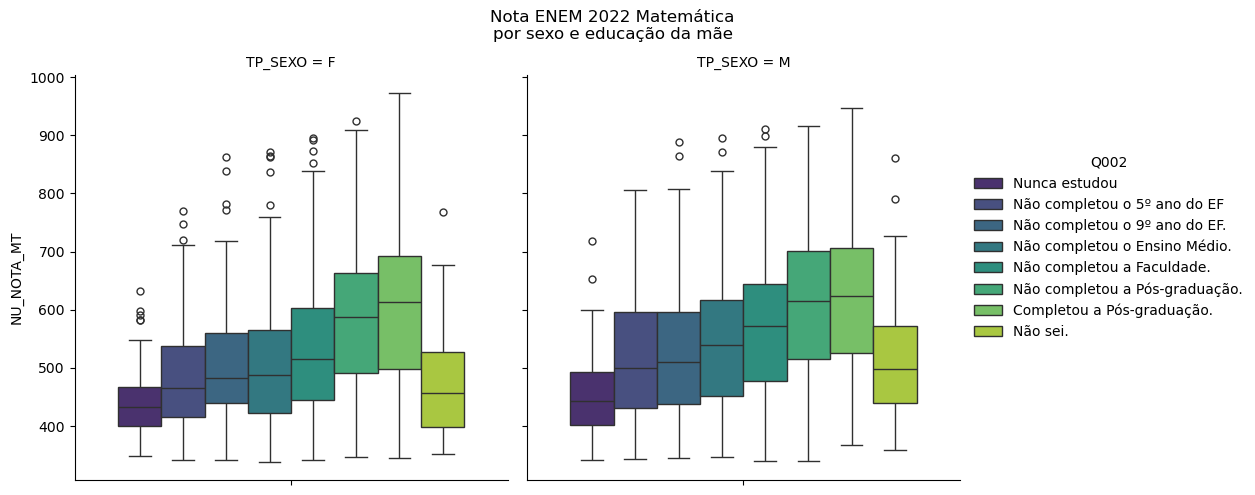

In [70]:
amostra = load_sample(2022,5000)
  
q2map = {'A':'Nunca estudou',
    'B':'Não completou o 5º ano do EF ',
    'C':'Não completou o 9º ano do EF.',
    'D':'Não completou o Ensino Médio.',
    'E':'Não completou a Faculdade.',
    'F':'Não completou a Pós-graduação.',
    'G':'Completou a Pós-graduação.',
    'H':'Não sei.'}
  

amostra['Q002'] = amostra['Q002'].map(q2map)
amostra['Q002']

ho = q2map.values()
g = sns.catplot(amostra,kind='box',y='NU_NOTA_MT',hue="Q002",hue_order=ho,col='TP_SEXO',palette='viridis')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Nota ENEM 2022 Matemática\npor sexo e educação da mãe")
plt.savefig('images/rel1-por-sexo-edu-mae.png');